In [2]:
# %pip uninstall boardlib
%pip install boardlib
# %pip install pandas
# %pip install pandasgui
# Download the kilter dataset by running this in the terminal:
# boardlib database kilter ./kilter.db

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sqlite3
import boardlib
import pandas as pd
# from pandasgui import show
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [4]:

con = sqlite3.connect('kilter.db')
cur = con.cursor()
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
table_names = [entry[0] for entry in table_list]
table_names.sort()
print(table_names)
con.close()

[]


In [5]:
def table_to_df(table_name):
    con = sqlite3.connect('kilter.db')

    df =  pd.read_sql_query(f"SELECT * FROM {table_name}", con)
    
    con.close()

    return df

In [6]:
# get all tables as dfs
for table_name in table_names:
    globals()[table_name] = table_to_df(table_name)
print("The available dataframes are: \n\t" + "\n\t".join(table_names))

The available dataframes are: 
	


In [7]:
# this feels so wrong but wcyd. Could reduce the lines of code but lets just keep it easy to read and understand
def map_vgrade(difficulty):
    if 10 <= difficulty < 12:
        return 0
    elif 12 <= difficulty < 14:
        return 1
    elif 14 <= difficulty < 16:
        return 2
    elif 16 <= difficulty < 18:
        return 3
    elif 18 <= difficulty < 20:
        return 4
    elif 20 <= difficulty < 22:
        return 5
    elif 22 <= difficulty < 23:
        return 6
    elif 23 <= difficulty < 24:
        return 7
    elif 24 <= difficulty < 26:
        return 8
    elif 26 <= difficulty < 28:
        return 9
    elif 28 <= difficulty < 29:
        return 10
    elif 29 <= difficulty < 30:
        return 11
    elif 30 <= difficulty < 31:
        return 12
    elif 31 <= difficulty < 32:
        return 13
    elif 32 <= difficulty < 33:
        return 14
    elif difficulty >= 33:
        return 15
    else:
        return None


### Create DF with necessary columns and data

In [8]:
# climb_cache_fields = globals()['climb_cache_fields']
merged_df = pd.merge(climbs, climb_stats, left_on='uuid', right_on='climb_uuid', how='inner') #.drop(columns=['frames'])
# Drop rows with layout_id not equal to 1
merged_df = merged_df[merged_df['layout_id'] == 1]

# remove rows with more than 1 ascensionist
merged_df = merged_df[merged_df['ascensionist_count'] >= 2]
merged_df['vgrade'] = merged_df['display_difficulty'].apply(map_vgrade)

filtered_columns = ['name','vgrade','angle_y','display_difficulty','created_at', 'ascensionist_count','frames','fa_username', 'benchmark_difficulty',  'is_draft',  'climb_uuid']
filtered_df = merged_df.loc[:, filtered_columns]

# print(merged_df_filtered.head().to_string(index=False))
# show(filtered_df)

# r12 - starthold  5
# r13 - hand hold  2
# r14 - finish hold 3
# r15 - foot hold   4
# p - hold position?

# p1454r15p1455r15p1457r15p1467r15p1469r15p1477r15p1485r15p1493r15p1511r15p1521r15p1532r15p1547r15p1549r15
# p1144r15 p1195r13 p1196r12 p1233r12 p1268r13 p1280r13 p1304r13 p1355r13 p1375r13 p1393r14 p1504r15 p1506r15 p1524r15 p1534r15 p1572r15 - EK | Crimp is not a crux

# p1085r15 p1124r12 p1176r12 p1196r13 p1244r13 p1283r13 p1332r13 p1383r14 p1385r14 p1504r15 p1514r15 - Pinch n' Gaston

# p1205r15 p1234r12 p1272r13 p1303r13 p1340r13 p1387r14 p1487r15 p1514r15 -sheep4wood

# p1165r12 p1271r13 p1286r13 p1333r14 p1469r15 p1476r15 - Fission

# p1146r12 p1163r12 p1227r13 p1249r13 p1265r13 p1269r14 p1457r15 p1467r15 p1484r15 p1496r15 p1503r15 p1506r15 p1516r15 - Plastic Age Mindset

# p1127r12 p1164r12 p1233r13 p1235r13 p1283r13 p1287r13 p1299r13 p1348r13 p1379r14 p1458r15 p1507r15 - anti-compressant

#layout_ids
# 1 - original board ( only meaningfulone)
# 2-8 ( other boards)


NameError: name 'climbs' is not defined

### Some Graphs

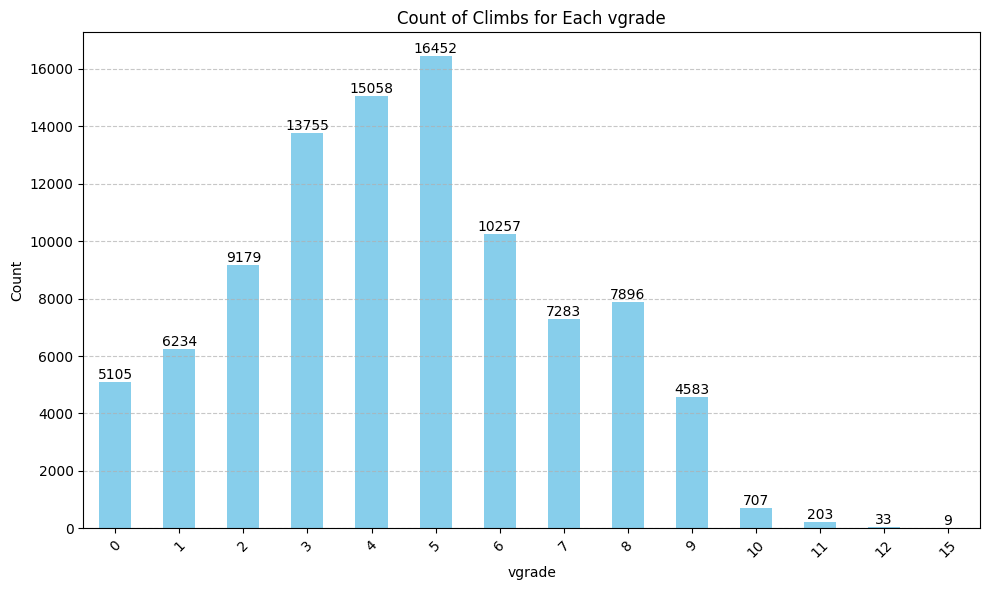

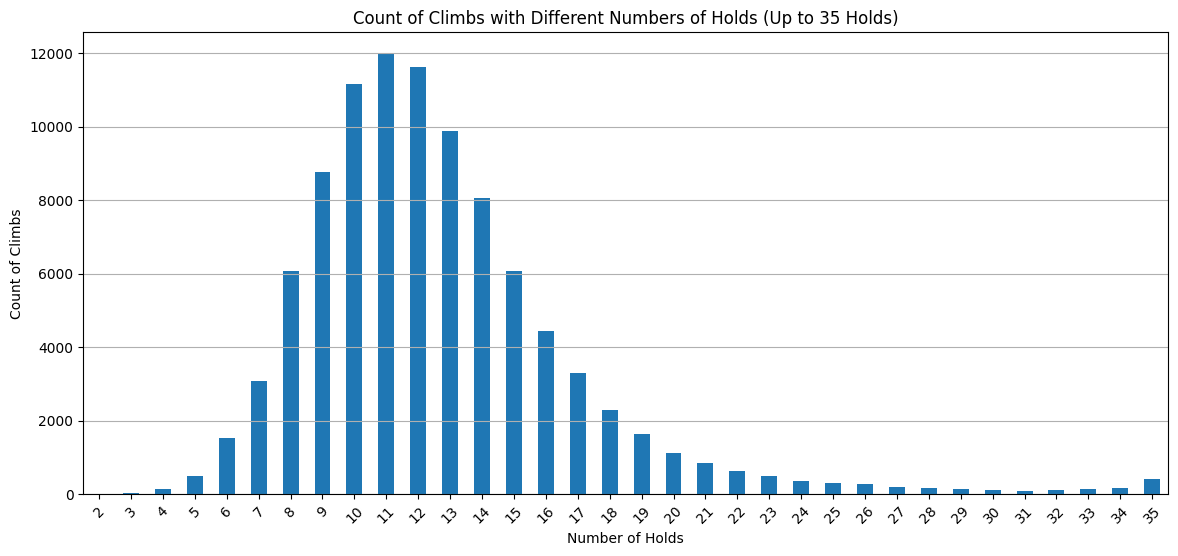

Average Number of Holds: 12.627250507046648


In [ ]:
# Calculate vgrade counts
vgrade_counts = filtered_df['vgrade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = vgrade_counts.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
plt.title('Count of Climbs for Each vgrade')
plt.xlabel('vgrade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Assuming 'filtered_df' contains your DataFrame with the 'frames' column
filtered_df['hold_count'] = filtered_df['frames'].str.count('p')

# Filter out counts beyond 35 holds
filtered_counts = filtered_df['hold_count'].value_counts().sort_index().loc[:35]

# Plotting the count of climbs with a certain number of holds
plt.figure(figsize=(14, 6))  # Adjust the width by changing the first value (e.g., 14)
filtered_counts.plot(kind='bar')
plt.title('Count of Climbs with Different Numbers of Holds (Up to 35 Holds)')
plt.xlabel('Number of Holds')
plt.ylabel('Count of Climbs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

total_hold_count = (filtered_counts.index * filtered_counts).sum()

# Calculate total count of climbs
total_climbs = filtered_counts.sum()

# Calculate average number of holds
average_holds = total_hold_count / total_climbs

print("Average Number of Holds:", average_holds)

### Preprocessing Data Functions

In [ ]:
# the value is:
# 2-feet 
# 3-start 
# 4-hand 
# 5-finish
def frame_to_ids(frame):
    ids_list_1 = []
    ids_list_2 = []
    
    # Split the frame string based on the 'p' delimiter
    filtered_frame = frame.replace(',', '').replace('"', '')
    frame_parts = filtered_frame.split('p')[1:]
    
    for entry in frame_parts:
        parts = entry.split('r')
        id_1 = int(parts[0])
        id_2 = int(parts[1])
        
        ids_list_1.append(id_1)
        if id_2 in [12, 13, 14, 15]:
            id_2 = [2, 3, 4, 5][id_2 - 12]
        ids_list_2.append(id_2)
    return ids_list_1, ids_list_2

def is_frame_valid(frame):
    # Extract the first list of IDs from the frame
    if "x" in frame:
        return False
    ids_list_1, _ = frame_to_ids(frame)
    
    # Check if any value in the first list is greater than 2000
    for value in ids_list_1:
        if value > 2000:
            return False
    return True



### Create Text File

In [ ]:
vgrade = -1  # set it to -1 for all grades
angle = -1

print(filtered_df.head())
if vgrade == -1:#all grades
    filtered_df = filtered_df.copy()
elif vgrade == 0:
    filtered_df = filtered_df[filtered_df['vgrade'].isin([0, 1])]
else:
    vgrade_range = [max(vgrade - 1, 0), min(vgrade + 1, 15)]
    print(vgrade_range )
    print((vgrade_range[0], vgrade_range[1]))
    filtered_df = filtered_df[filtered_df['vgrade'].between(vgrade_range[0], vgrade_range[1])]
    
# filter climbs angle  
if angle == -1:
    pass
else:
    filtered_df = filtered_df[filtered_df['angle_y'] == angle]

# filter the DataFrame using is_frame_valid function
valid_mask = filtered_df['frames'].apply(is_frame_valid)
filtered_df = filtered_df[valid_mask]

# Extract frames from the DataFrame and concatenate them with spaces
climb_frames = filtered_df['frames'].apply(lambda x: ' '.join(x.split('p')))
with open('climbs.txt', 'w') as file:
    for climb in climb_frames:
        file.write(climb + '\n')


                       name  vgrade  angle_y  display_difficulty  \
1     what kind of triangle       8       45             25.0000   
4               marks 1 try       2       30             14.0000   
5               marks 1 try       2       55             14.3333   
9   dead points (tristyn) 1       3       30             17.5000   
10                easy clap       4       45             19.3333   

                    created_at  ascensionist_count  \
1   2020-01-05 17:57:32.213641                   2   
4   2020-10-20 21:31:19.064510                   2   
5   2020-10-20 21:31:19.064510                   3   
9   2020-10-20 23:37:41.285379                   2   
10  2019-12-04 05:21:14.908093                   3   

                                               frames    fa_username  \
1   p1123r12p1139r13p1155r12p1171r13p1187r13p1203r...        bctyner   
4   p1141r15p1142r12p1144r15p1179r12p1192r13p1246r...  rob.hakansson   
5   p1141r15p1142r12p1144r15p1179r12p1192r13p1246r

### Preprocessing Data Functions

In [ ]:
def id_to_index(id):
    
    if id <=1089: #bottom large (row) 17x1
        index_offset = 35
        row_index = 16 - (id - 1074)
        final_index = index_offset + 2 * row_index
    elif id <= 1395: #big holds (matrix) 17x18
        index_offset = 35 + 35
        index = id-1089
        row = index//17
        row_index = index%17
        final_index = index_offset + row * 70 + 2 *row_index   
    elif id <=1464: #bottom small (row) 18x1
        row_index = 17 - (id - 1447)
        final_index = 2 * row_index + 1
    elif id <= 1599: # small holds (matrix) 9x15
        index_offset = 35 + 35 + 35 + 1
        index = id-1464
        row = index//9
        row_index = index% 9
        final_index = index_offset + row * 70 + 4 * (row_index-1)
    else:
        final_index = id
        print(id) 
    return final_index

def id_to_coordinate(id):
    index = id_to_index(id)-1
    x = index % 35
    y = index//35
    if y >=35:
        y-=2 #because the top 2 rows of large hand holds dont have any feet so its offset
    return (x,y)

# ids = [1464,1447,1088,1089,1090,1107,1109, 1465]
# for id in range(len(ids)):
#     print(f"position {id+1}({ids[id]}): {id_to_index(ids[id])} {id_to_coordinate(ids[id])}")

# the value is:
# 2-feet 
# 3-start 
# 4-hand 
# 5-finish
def frame_to_ids(frame):
    ids_list_1 = []
    ids_list_2 = []
    
    # Split the frame string based on the 'p' delimiter
    filtered_frame = frame.replace(',', '').replace('"', '')
    frame_parts = filtered_frame.split('p')[1:]
    
    for entry in frame_parts:
        parts = entry.split('r')
        id_1 = int(parts[0])
        id_2 = int(parts[1])
        
        ids_list_1.append(id_1)
        if id_2 in [12, 13, 14, 15]:
            id_2 = [2, 3, 4, 5][id_2 - 12]
        ids_list_2.append(id_2)
    return ids_list_1, ids_list_2

# takes in frame and converts to list of triplets with xy being coordiante in board matrix and z being the value
def frame_to_triplets(frame):
    ids_list_1, ids_list_2 = frame_to_ids(frame)
    
    triplet_list = []
    for id_1, id_2 in zip(ids_list_1, ids_list_2):
        coordinate = id_to_coordinate(id_1)
        triplet = (coordinate[0], coordinate[1], id_2)
        triplet_list.append(triplet)
    
    return triplet_list

frame = "p1127r12p1164r12p1233r13p1235r13p1283r13p1287r13p1299r13p1348r13p1379r14p1458r15p1507r15"
triplet_list = frame_to_triplets(frame)
print("Triplet List:", triplet_list)

def triplets_to_matrix(triplet_list):
    # Initialize a 35x35 matrix with zeros
    matrix = [[0] * 35 for _ in range(35)]
    
    # Populate the matrix with z-values from the triplets
    for triplet in triplet_list:
        x, y, z = triplet
        matrix[34-y][x] = z
    
    return matrix

# matrix = triplets_to_matrix(triplet_list)
# for row in matrix:
#     print(row)

def frame_to_sparse_matrix(frame):
    triplet_list = frame_to_triplets(frame)
    matrix = triplets_to_matrix(triplet_list)
    sparse_matrix = sp.coo_matrix(matrix)
    return sparse_matrix

def is_frame_valid(frame):
    # Extract the first list of IDs from the frame
    if "x" in frame:
        return False
    ids_list_1, _ = frame_to_ids(frame)
    
    # Check if any value in the first list is greater than 2000
    for value in ids_list_1:
        if value > 2000:
            return False
    return True

Triplet List: [(7, 6, 2), (13, 10, 2), (15, 18, 3), (19, 18, 3), (13, 24, 3), (21, 24, 3), (11, 26, 3), (7, 32, 3), (1, 34, 4), (12, 0, 5), (24, 11, 5)]


In [ ]:
# Define a function to plot a sparse matrix with different hold types as different colors
def plot_climb(sparse_matrix, title):
    # Define a dictionary to map hold values to colors
    hold_colors = {2: '#00FF00', 3: '#00FFFF', 4: '#FF00FF', 5: 'orange'}

    # Get the x, y, and z values from the sparse matrix
    x = sparse_matrix.col
    y = sparse_matrix.row
    z = sparse_matrix.data
    
    # Plot the sparse matrix with different hold types as different colors
    plt.xlim(-1, 35)
    plt.ylim(-1, 35)
    plt.gca().set_aspect('equal', adjustable='box')
    for i in range(len(x)):
        plt.scatter(x[i], 34 - y[i], color=hold_colors[z[i]], s=50)
    
    # plot every single point as a tiny grey dot to show graph
    for i in range(35):
        for j in range(35):
            plt.scatter(i, j, color='grey', s=1)
    
    # Set the title and labels
    plt.title(title)
    
    # Show the plot
    plt.show()



### Markov Chain Model

In [ ]:
from collections import defaultdict
import string
import random

class Markov():
    def __init__(self, file_path):
        self.file_path = file_path
        self.text = self.remove_punctuations(self.get_text())
        self.model = self.model()

    def get_text(self):
        text = []
        for line in open(self.file_path):
            text.append(line)
        return ' '.join(text)
    
    def remove_punctuations(self, text):
        return text.translate(str.maketrans('','', string.punctuation))
    
    def model(self):
        # split the input text into individual words seperated by spaces
        words = self.text.split(' ')
        markov_dict = defaultdict(list)
        # create list of all word pairs
        for current_word, next_word in zip(words[0:-1], words[1:]):
            markov_dict[current_word].append(next_word)
        markov_dict = dict(markov_dict)
        print('Successfully Trained')
        return markov_dict
    
def predict_words(chain, first_word, number_of_words):
    if first_word in list(chain.keys()):
        word1 = str(first_word)
        predictions = word1.capitalize()
        # Generate the second word from the value list. Set the new word as the first word. Repeat.
        for i in range(number_of_words):
            word2 = random.choice(chain[word1])
            word1 = word2
            predictions += ' ' + word2
        # End it with a period
        predictions += '.'
        return predictions
    else:
        return "Word not in corpus"
    
def is_valid_sequence(sequence):
    # Count the number of start holds (r12) and finish holds (r14)
    start_hold_count = sequence.count('r12')
    finish_hold_count = sequence.count('r14')

    # Check if the counts are within the specified range
    return 1 <= start_hold_count <= 2 and 1 <= finish_hold_count <= 2

def predict_valid_sequence(chain, start_hold, number_of_words):
    while True:
        # Generate a sequence of words using the Markov chain model
        sequence = predict_words(chain, start_hold, number_of_words)
        
        # Convert the sequence to a string
        sequence_str = ' '.join(sequence.split())
        # Check if the sequence is valid
        if is_valid_sequence(sequence_str):
            return sequence_str

if __name__ == '__main__':
    m = Markov(file_path='climbs.txt')
    chain = m.model
    start_hold = '1081r15'  # Example start hold
    
    # Predict a valid sequence
    valid_sequence = predict_valid_sequence(chain, start_hold, number_of_words=13)
    print("Valid Sequence:", valid_sequence)

    frame = "p" + "p".join(valid_sequence.split(' '))
    sparse_matrix = frame_to_sparse_matrix(valid_sequence)
    plot_climb(sparse_matrix, 'Valid Sequence')

# r12 - starthold  
# r13 - hand hold  
# r14 - finish hold 
# r15 - foot hold   

Successfully Trained
Valid Sequence: 1081r15 1086r15 1145r12 1232r13 1287r13 1300r13 1302r13 1354r13 1385r14 1447r15 1451r15 1481r15 1496r15 1547r15 .


NameError: name 'frame_to_sparse_matrix' is not defined